## 1차원 데이타
 - 평균값(기대값), 표본과 분산, 불편분산(ddof=1), 표준편차
 - 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며, 그 경향을 없애기 위한것이 불편분산임. 표본분산 보다 조금 큰 값이 된다.
 - 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
 - 최댓값, 최솟값, 중앙값, 사분위수
 - 표본분산과 비편향 분산
 - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재함
 - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을때는 표본분산이 모분산보다 작아진다.
 - 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
 - 통계학에서는 이 비편향 분산을 사용하는 경우가 많다.
 - 불편분산은 n대신 n-1로 나누어 구할 수 있다.
 
 [표본분산이 분산을 과소 평가하는 이유]
  - 

In [2]:
!pip install numpy

In [3]:
!pip install pandas

In [4]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [5]:
scores = np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [6]:
score_df = pd.DataFrame({'score':scores},
                        index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))

score_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [7]:
#평균
print(sum(scores)/len(scores))
print(np.mean(scores))
score_df.mean()

55.0
55.0


score    55.0
dtype: float64

In [8]:
#middle number
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [9]:
# 중앙값 계산하는 방식
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 -1]
median


56.5

In [10]:
# 확인하는방법1(numpy)
np.median(scores)

56.5

In [11]:
# 확인하는방법(pandas)
score_df.median()

score    56.5
dtype: float64

In [12]:
# 최빈값
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [13]:
# 분산과 표준편차
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [14]:
# 편차
mean = np.mean(scores)
print(mean)
deviation = scores - mean
deviation

55.0


array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [15]:
np.mean(deviation)

0.0

In [16]:
# Q. 20개 원소로 구성되느느 배열을 만든 후 평균, 편차 및 편차의 합을 구하세요
zeos = np.random.randint(0,19,size=20)
zeos

array([13,  8, 12, 15,  2,  3,  9,  2,  0, 13,  6,  4,  5, 11,  7,  1, 14,
       14,  2,  3])

In [17]:
mean = np.mean(zeos)
print(mean)
dev = zeos - mean
print(dev)
display(np.sum(dev))

7.2
[ 5.8  0.8  4.8  7.8 -5.2 -4.2  1.8 -5.2 -7.2  5.8 -1.2 -3.2 -2.2  3.8
 -0.2 -6.2  6.8  6.8 -5.2 -4.2]


-3.552713678800501e-15

분산 
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산
 * Numpy는 표본분산, Pandas는 불편분산
 * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof=0이라고 설정 , 불편분산(편향이 없는 분산)은 ddof=1일때 해당됨.

In [18]:
np.mean(deviation ** 2)

86.0

In [19]:
np.var(scores)

86.0

In [20]:
score_df.var()

score    95.555556
dtype: float64

In [21]:
df = score_df.copy()
df['deviation'] = deviation
df['square of deviation'] = np.square(deviation)
df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [22]:
df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [23]:
# 표준편차 구하는방법(pandas)
np.sqrt(np.var(scores,ddof=0))

9.273618495495704

In [24]:
np.std(scores)

9.273618495495704

In [25]:
df.std()

score                   9.775252
deviation               9.775252
square of deviation    78.335461
dtype: float64

In [26]:
# 범위와 4분위수 범위
np.max(scores) - np.min(scores)

28

In [27]:
#4분위 구하기
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [28]:
# 요약 통계표 (판다스에서 사용가능)
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [29]:
# 데이터의 정규화

print(f'평균:{scores.mean()}, 표준편차: {scores.std().round(4)}')

평균:55.0, 표준편차: 9.2736


In [30]:
# 표준화(중요)   편차를 표준편차로 나눈 값
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [31]:
np.mean(z),np.std(z)

(-1.6653345369377347e-17, 0.9999999999999999)

In [32]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [33]:
score_df['deviation_value'] = z

In [34]:
score_df

,score,deviation_value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [35]:
df = pd.read_csv('./data/ch2_scores_em.csv')
eng_scores = np.array(df.english)
pd.Series(eng_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [36]:
# 도수분포표
freq, _ = np.histogram(eng_scores, bins=10,range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [37]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq},
                           index = pd.Index(freq_class,
                                           name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [38]:
# 계급값 : 각 계급을 대표하는 값으로 계급의 중앙값이 이용돔
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [39]:
# 상대도수 : 해당 계급의 데이터의 상대적인 비율
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [40]:
# 누적 상대 도수: 해당 계급까지 상대도수 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [41]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] =  rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df

,frequency,class value,relative frequency,cumulative relative frequency
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


In [42]:
# class에서의 최빈값 구하기
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']

65

In [43]:
!pip install matplotlib

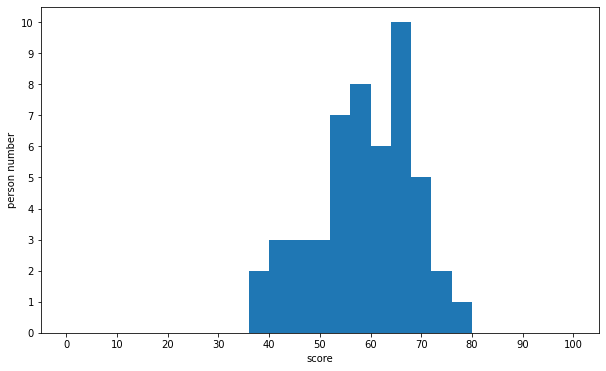

In [44]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
freq,_,_ = ax.hist(eng_scores, bins=25, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()
plt.close()

# 범주를 어떻게 할것인가..

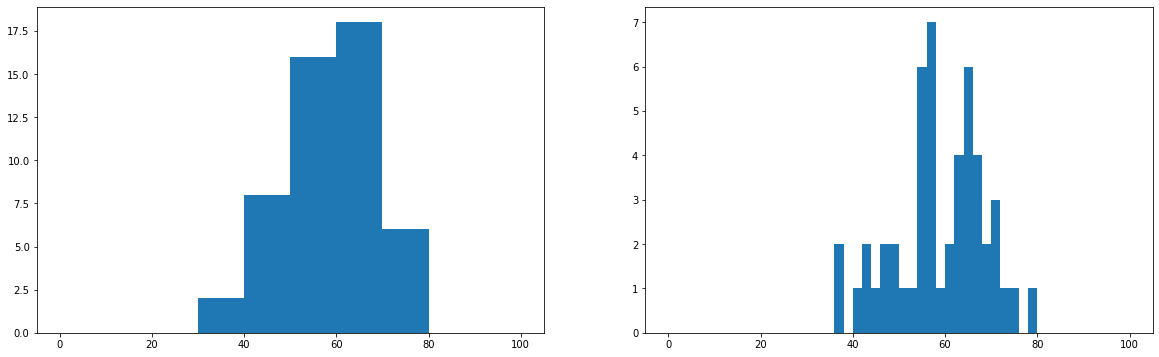

In [45]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
freq,_,_ = ax1.hist(eng_scores, bins=10, range=(0,100))
freq,_,_ = ax2.hist(eng_scores, bins=50, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()
plt.close()


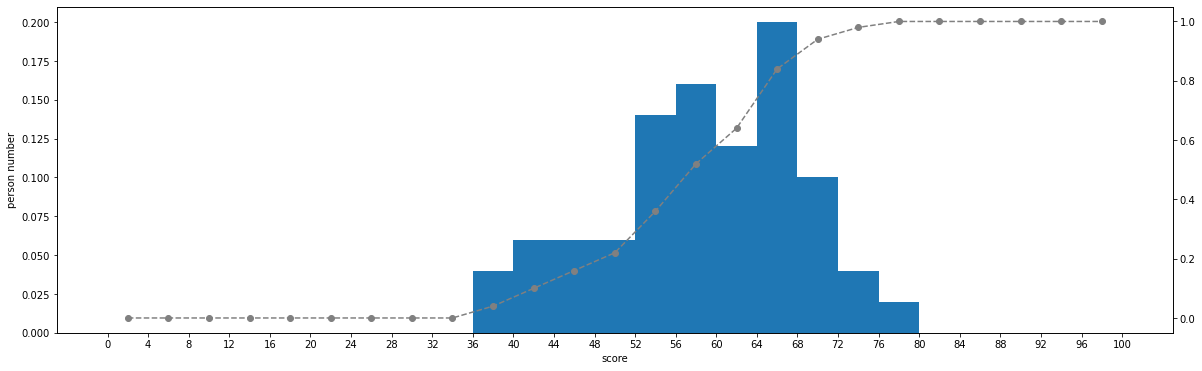

In [46]:
# 누적 히스토그램

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(111)
#y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()
# 상대도수의 히스토그램으로 하기 위해서는 도수를 데이터의 수로 나눌 필요가 있음. 
weights = np.ones_like(eng_scores) / len(eng_scores)
rel_freq,_,_ = ax1.hist(eng_scores, bins=25, range=(0,100),weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

ax2.plot(class_value, cum_rel_freq, ls='--',marker='o',color='gray')
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('person number')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()
plt.close()


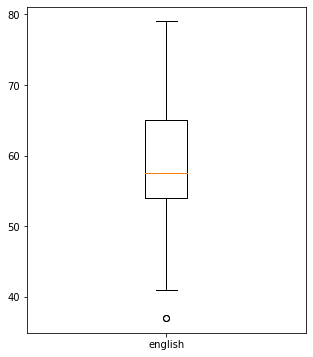

In [47]:
# 그림
fig =plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(eng_scores, labels=['english'])
plt.show()
plt.close()

In [48]:
# 표본분산
data = np.array([2,3,3,4,4,4,4,5,5,6])
mu = np.sum(data)/len(data)
print(mu)
s = np.sum((data-mu)**2)/len(data)
s

4.0


1.2

In [49]:
# 불편분산
s1 = np.sum((data-mu)**2)/(len(data)-1)
s1

1.3333333333333333

예시)
- 호수안에 물고기가 7마리가 있다. 몸 길이{1,2,3,4,5,6,7}, 모평균 4, 샘플링 3마리{1,2,3}, 표본평균 2
- 이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.

In [50]:
#[과제] 1변향(1차원)데이터 data에 대하여 평균, 표본분산, 불편분산, 편차, 표준편차, 최대, 최소, 4분위수, 중앙값을 구하세요
# 단! 함수를 사용하는 경우와 사용하지 않는 경우를 모두 수행
data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

In [51]:
dft = data.copy()

In [52]:
# 평균
print(sum(data)/len(data))
mean = np.mean(data)
print(mean)

4.0
4.0


In [53]:
#표본분산
mu1 = np.sum(data)/len(data)
print(mu1)
s = np.sum((data-mu1)**2)/len(data)
s

4.0


1.2

In [54]:
np.var(dft)

1.2

In [55]:
# 불편분산
s3 = np.sum((data-mu1)**2)/(len(data)-1)
s3

1.3333333333333333

In [56]:
np.var(data, ddof=1)

1.3333333333333333

In [57]:
#편차
deviation = data - mean
deviation


array([-2., -1., -1.,  0.,  0.,  0.,  0.,  1.,  1.,  2.])

In [58]:
#표준편차
np.sqrt(np.var(data,ddof=0))

1.0954451150103321

In [59]:
np.std(data,ddof=0)

1.0954451150103321

In [60]:
#최대
np.max(data)

6

In [61]:
#최소
np.min(data)

2

In [62]:
b = data
max = b[0]
min = b[0]

for i in range(len(b)):
    if(max > b[i]):
        max = max
    else:
        max = b[i]
        
    if(min < b[i]):
        min=min
    else:
        min = b[i]
        
print("최대값:",max)
print("최소값:",min)

최대값: 6
최소값: 2


In [63]:
#4분위수
data_Q1 = np.percentile(data,25)
data_Q3 = np.percentile(data,75)
print(data_Q3)
print(data_Q1)


4.75
3.25


In [64]:
sp = np.median(data)
sp

4.0

In [65]:
#중앙값
n = len(data)
if n % 2 ==0:
    m0 = data[n//2-1]
    m1 = data[n//2]
    median = (m0 + m1) / 2
else:
    median = data[(n+1)//2 -1]
print(median,'\n')
np.median(data)

4.0 



4.0

## 2차원 데이터

In [66]:
df = pd.read_csv('./data/ch2_scores_em.csv', index_col='student number')

en_scores = np.array(df.english)[:10]
ms_scores = np.array(df.mathematics)[:10]
sdf = pd.DataFrame({'english':en_scores,
                    'mathematics':ms_scores},
                   index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
sdf.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [67]:
# 공분산
dfc = sdf.copy()
dfc['eng_deviation'] = dfc.english - dfc.english.mean()
dfc['math_deviation'] = dfc.mathematics - dfc.mathematics.mean()
dfc['product of deviation'] = dfc['eng_deviation']*dfc['math_deviation']
dfc

,english,mathematics,eng_deviation,math_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [68]:
dfc['product of deviation'].mean()

62.8

In [69]:
#ddof 확인 요망
cov_mat = np.cov(en_scores,ms_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [70]:
np.var(en_scores,ddof=0), np.var(ms_scores,ddof=0)

(86.0, 68.44000000000001)

In [71]:
# 상관계수
np.cov(en_scores,ms_scores,ddof=0)[0,1] /(np.std(en_scores)*np.std(ms_scores))

0.8185692341186713

In [72]:
np.corrcoef(en_scores,ms_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [73]:
dfc[['english','mathematics']].corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


In [74]:
# [과제] 10행 2열 2차원 배열을 생성하고 두열간의 공분산 및 상관계수를 구하세요
# (단, numpy,pandas 두가지 방식으로 모두 수행)

In [75]:
gdf = np.arange(20).reshape(10,2)
gdf

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

In [76]:
gdf.mean(axis=0)

array([ 9., 10.])

In [77]:
gdf.var(axis=0)

array([33., 33.])

In [78]:
sdf = pd.DataFrame({'english':en_scores,
                    'mathematics':ms_scores},
                   index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
sdf.head(10)

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [79]:
dfc = sdf.copy()
dfc['eng_deviation'] = dfc.english - dfc.english.mean()
dfc['math_deviation'] = dfc.mathematics - dfc.mathematics.mean()
dfc['product of deviation'] = dfc['eng_deviation']*dfc['math_deviation']
dfc

,english,mathematics,eng_deviation,math_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [80]:
np.var(en_scores,ddof=0), np.var(ms_scores,ddof=0)

(86.0, 68.44000000000001)

In [81]:
np.cov(en_scores,ms_scores,ddof=0)[0,1] /(np.std(en_scores)*np.std(ms_scores))

0.8185692341186713

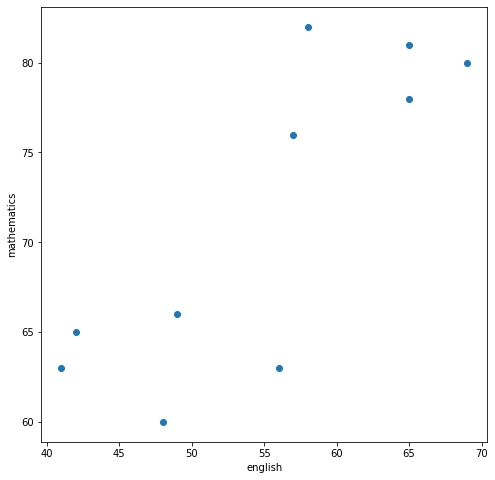

In [143]:
# 산점도
df2 = dfc[['english','mathematics']]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(df2.english,df2.mathematics)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
plt.show()
plt.close()  # 넣지 않아도 나옴(적지 않으면 메모리에 남아서 섞일 수 있음)

다항곡선 회귀분석

기본 문법: p = polyfit(x,y,n)

https://qlsenddl-lab.tistory.com/48

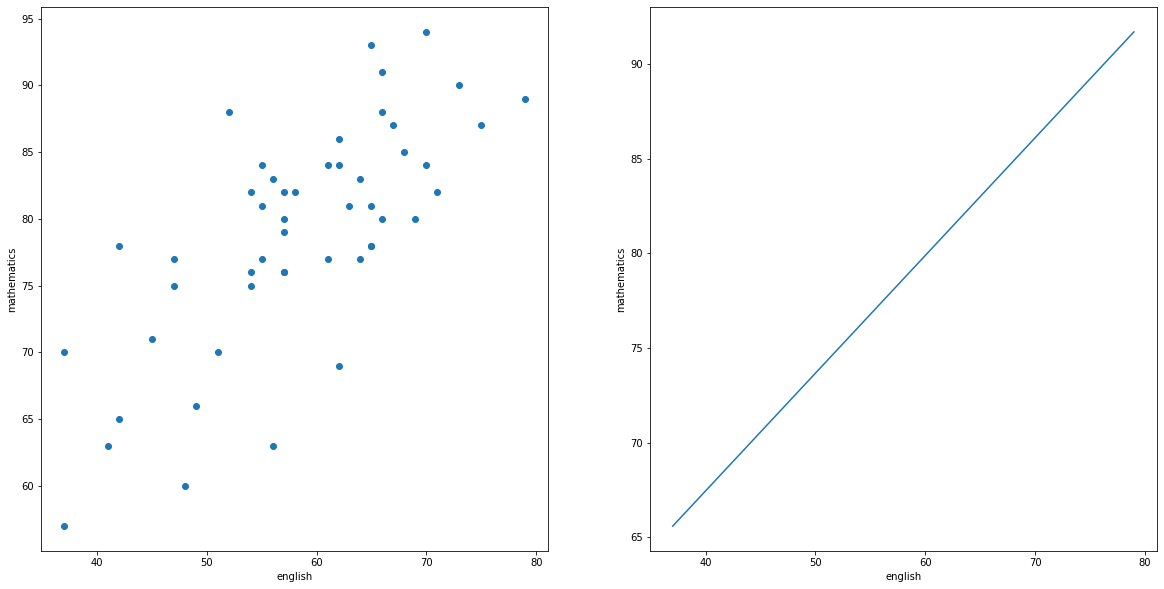

In [93]:
# 회귀직선
eng_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])
# 계수 구하기
poly_fit = np.polyfit(eng_scores,math_scores,1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(eng_scores.min(),eng_scores.max())
ys = poly_1d(xs)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(eng_scores,math_scores)
ax2.plot(xs,ys)
ax1.set_xlabel('english')
ax1.set_ylabel('mathematics')
ax2.set_xlabel('english')
ax2.set_ylabel('mathematics')
plt.show()

In [99]:
!pip install seaborn

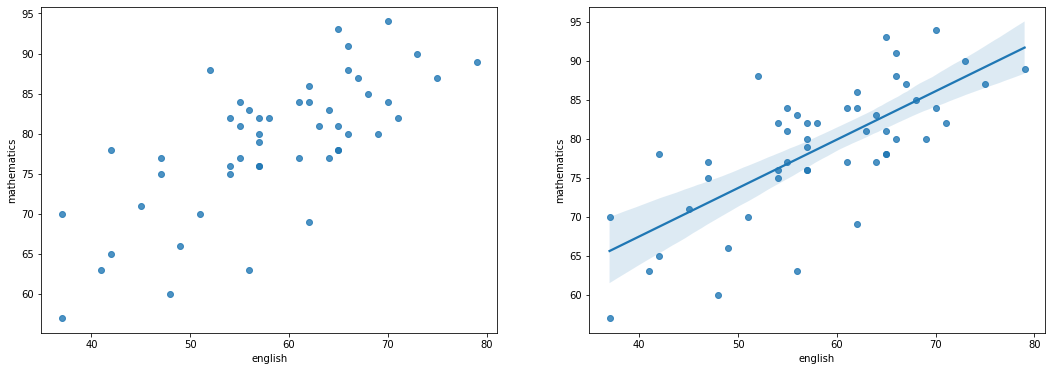

In [105]:
import seaborn as sns
fig,axes = plt.subplots(1,2,figsize=(18,6),sharex=True)
sns.regplot(ax=axes[0], x=df.english, y= df.mathematics, fit_reg=False)
sns.regplot(ax=axes[1], x=df.english, y= df.mathematics)
plt.show()

C:\Users\admin\Anaconda3\envs\cakd5\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='english', ylabel='mathematics'>

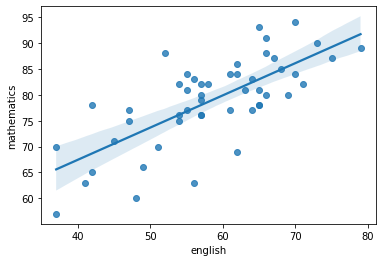

In [102]:
sns.regplot('english','mathematics',df)

In [ ]:
# Q. english와 mathematics 두변수의 상관관계를 히트맵으로 표현하세요

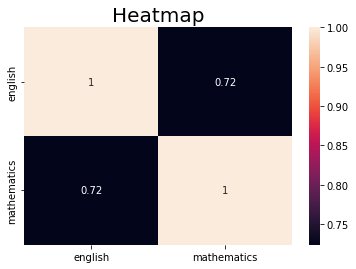

In [113]:
import matplotlib.pyplot as plt
sns.heatmap(df[['english','mathematics']].corr(),annot=True)
plt.title('Heatmap', fontsize=20)
plt.show()
plt.close()

In [115]:
df.mathematics.mean()

78.88

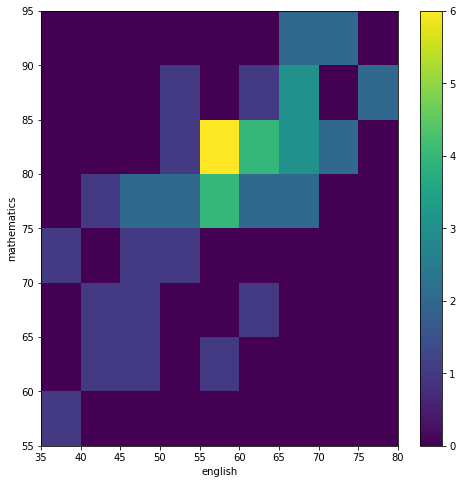

In [114]:
# hist2d 메소드로 히트맵 작성
fig = plt.figure(figsize=(8,8))
ax =fig.add_subplot(111)

c = ax.hist2d(eng_scores,math_scores,
             bins= [9,8], range=[(35,80),(55,95)])
# print(c)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3],ax=ax)
plt.show()

In [119]:
anscombe_data = np.load('./data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [121]:
stats_df = pd.DataFrame(index=['X_mean','X_variance','Y_mean','Y_variance',
                               'X&Y_correlation','X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:,0]
    dataY = data[:,1]
    poly_fit = np.polyfit(dataX,dataY,1)
    stats_df[f'data{i+1}'] = [f'{np.mean(dataX):.2f}',
                              f'{np.var(dataX):.2f}',
                              f'{np.mean(dataY):.2f}',
                              f'{np.var(dataY):.2f}',
                              f'{np.corrcoef(dataX,dataY)[0,1]:.2f}',
                              f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


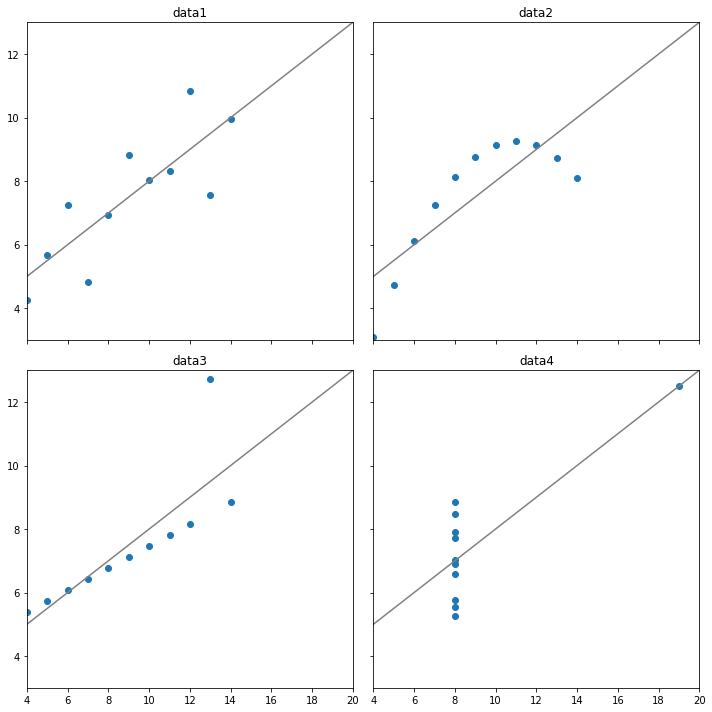

In [124]:
# 시각화
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10),
                       sharex=True,sharey=True)
xs = np.linspace(0,30,100)
for i,data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1],1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    ax = axes[i//2, i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0],data[:,1])
    ax.plot(xs,ys,color='gray')
plt.tight_layout()
plt.show()

In [ ]:
# Q species 그룹별 통계량을 구하세요

In [85]:
import pandas as pd
fdf = pd.read_csv('./data/5_2_fm.csv')
fdf

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [126]:
fdf.groupby('species').describe()


length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

In [ ]:
# 각 store의 컬러별 판매량을 파악할 수 있는 피봇테이블을 작성하세요

In [86]:
import pandas as pd
sdf = pd.read_csv('./data/5_2_shoes.csv')
sdf

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [127]:
sdf.pivot('store','color','sales')

color,blue,red
store,,
osaka,13,9
tokyo,10,15


In [130]:
sdf.pivot_table(index=['store','color'],values='sales',aggfunc='sum')


sales
store color       
osaka blue      13
      red        9
tokyo blue      10
      red       15

In [129]:
cdf = pd.read_csv('./data/4_cov.csv')
cdf

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


In [137]:
# Q. x,y의 공분산을 구하세요
x_dev = cdf.x - cdf.x.mean()
y_dev = cdf.y - cdf.y.mean()
cov = sum(x_dev * y_dev)/(len(cdf)-1)
print(round(cov,2),'\n')
np.cov(x_dev,y_dev,ddof=1)

7.67 



array([[ 3.64622222,  7.67333333],
       [ 7.67333333, 28.01111111]])

In [136]:
# Q 상관행렬을 구하세요
display(cdf.cov().iloc[0,1].round(2), cdf.corr())


7.67

,x,y
x,1.000000,0.759272
y,0.759272,1.000000
